In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.(you can only unzip a zipped tuple once before it is removed from the computer memory.  )
# this step is unzipping the pairs of lats and lngs into the coordinates list. 
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [6]:
#import requests library 
import requests

# Import the weather API key.
from config import weather_api_key

In [7]:
# Build the basic URL for the OpenWeatherMap with your weather_api_key added to the URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list. 
#This is not a good option for retrieving the cities because it pulls the index of the city and will cause errors. in order to get the city name we need to create another for loop. instead of creating a second for loop we can use the code with enumerate such as in the next box.  
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 12 | jamestown
Processing Record 2 of Set 12 | durant
Processing Record 3 of Set 12 | nikolskoye
Processing Record 4 of Set 12 | burnie
Processing Record 5 of Set 12 | rikitea
Processing Record 6 of Set 12 | tuatapere
Processing Record 7 of Set 12 | albany
Processing Record 8 of Set 12 | ushuaia
Processing Record 9 of Set 12 | port alfred
Processing Record 10 of Set 12 | kodiak
Processing Record 11 of Set 12 | evensk
Processing Record 12 of Set 12 | attawapiskat
City not found. Skipping...
Processing Record 13 of Set 12 | cape town
Processing Record 14 of Set 12 | jalesar
Processing Record 15 of Set 12 | busselton
Processing Record 16 of Set 12 | mayo
Processing Record 17 of Set 12 | ahipara
Processing Record 18 of Set 12 | hasaki
Processing Record 19 of Set 12 | tura
Processing Record 20 of Set 12 | mataura
Processing Record 21 of Set 12 | bethel
Processing Record 22 of Set 12 | clyde river
Processing Record 23 of Set 12 | kahului
Processing Record 24 of Set

Processing Record 34 of Set 15 | kruisfontein
Processing Record 35 of Set 15 | rawson
Processing Record 36 of Set 15 | kieta
Processing Record 37 of Set 15 | tres lagoas
Processing Record 38 of Set 15 | saint george
Processing Record 39 of Set 15 | visnes
Processing Record 40 of Set 15 | westport
Processing Record 41 of Set 15 | kenitra
Processing Record 42 of Set 15 | henties bay
Processing Record 43 of Set 15 | lerwick
Processing Record 44 of Set 15 | da nang
Processing Record 45 of Set 15 | ostrovnoy
Processing Record 46 of Set 15 | hokitika
Processing Record 47 of Set 15 | sembakung
Processing Record 48 of Set 15 | pueblo nuevo
Processing Record 49 of Set 15 | baniachang
Processing Record 50 of Set 15 | erzin
Processing Record 1 of Set 16 | tasiilaq
Processing Record 2 of Set 16 | necochea
Processing Record 3 of Set 16 | grand-santi
Processing Record 4 of Set 16 | kamenka
Processing Record 5 of Set 16 | chama
Processing Record 6 of Set 16 | ilulissat
Processing Record 7 of Set 16 |

Processing Record 18 of Set 19 | koroni
Processing Record 19 of Set 19 | rio grande
Processing Record 20 of Set 19 | san vicente
Processing Record 21 of Set 19 | fukue
Processing Record 22 of Set 19 | iquitos
Processing Record 23 of Set 19 | griffith
Processing Record 24 of Set 19 | shaowu
Processing Record 25 of Set 19 | semey
Processing Record 26 of Set 19 | arcachon
Processing Record 27 of Set 19 | camacha
Processing Record 28 of Set 19 | akhmeta
Processing Record 29 of Set 19 | itapirapua
Processing Record 30 of Set 19 | acari
Processing Record 31 of Set 19 | izhma
Processing Record 32 of Set 19 | arraijan
Processing Record 33 of Set 19 | san marco in lamis
Processing Record 34 of Set 19 | mount isa
Processing Record 35 of Set 19 | adoni
Processing Record 36 of Set 19 | porecatu
Processing Record 37 of Set 19 | limbang
Processing Record 38 of Set 19 | zyryanka
Processing Record 39 of Set 19 | okhotsk
Processing Record 40 of Set 19 | gujrat
Processing Record 41 of Set 19 | iroquois 

Processing Record 8 of Set 23 | porto velho
Processing Record 9 of Set 23 | bassano
Processing Record 10 of Set 23 | khartoum
Processing Record 11 of Set 23 | laguna
Processing Record 12 of Set 23 | kontagora
Processing Record 13 of Set 23 | courtenay
Processing Record 14 of Set 23 | zalantun
Processing Record 15 of Set 23 | grafton
Processing Record 16 of Set 23 | honiara
Processing Record 17 of Set 23 | estelle
Processing Record 18 of Set 23 | puerto escondido
Processing Record 19 of Set 23 | erenhot
Processing Record 20 of Set 23 | quartucciu
Processing Record 21 of Set 23 | puerto ayacucho
Processing Record 22 of Set 23 | osuna
Processing Record 23 of Set 23 | yeniseysk
Processing Record 24 of Set 23 | wakkanai
Processing Record 25 of Set 23 | kalmunai
Processing Record 26 of Set 23 | karkaralinsk
City not found. Skipping...
Processing Record 27 of Set 23 | katha
City not found. Skipping...
Processing Record 28 of Set 23 | cayenne
Processing Record 29 of Set 23 | mount gambier
Proc

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,35.01,95,90,7.16,US,2021-03-04 00:07:06
1,Durant,33.9940,-96.3708,66.20,37,1,6.91,US,2021-03-04 00:07:06
2,Nikolskoye,59.7035,30.7861,33.01,80,40,13.42,RU,2021-03-04 00:07:07
3,Burnie,-41.0667,145.9167,71.01,72,93,18.99,AU,2021-03-04 00:07:07
4,Rikitea,-23.1203,-134.9692,79.84,79,28,8.41,PF,2021-03-04 00:05:18
5,Tuatapere,-46.1333,167.6833,59.00,59,32,7.00,NZ,2021-03-04 00:07:08
6,Albany,42.6001,-73.9662,37.99,60,90,8.05,US,2021-03-04 00:05:44
7,Ushuaia,-54.8000,-68.3000,53.60,54,20,3.76,AR,2021-03-04 00:06:03
8,Port Alfred,-33.5906,26.8910,69.01,93,71,1.99,ZA,2021-03-04 00:07:08
9,Kodiak,57.7900,-152.4072,39.20,48,20,13.80,US,2021-03-04 00:05:18


In [13]:
#reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-03-04 00:07:06,42.0970,-79.2353,35.01,95,90,7.16
1,Durant,US,2021-03-04 00:07:06,33.9940,-96.3708,66.20,37,1,6.91
2,Nikolskoye,RU,2021-03-04 00:07:07,59.7035,30.7861,33.01,80,40,13.42
3,Burnie,AU,2021-03-04 00:07:07,-41.0667,145.9167,71.01,72,93,18.99
4,Rikitea,PF,2021-03-04 00:05:18,-23.1203,-134.9692,79.84,79,28,8.41
...,...,...,...,...,...,...,...,...,...
540,Waingapu,ID,2021-03-04 00:09:45,-9.6567,120.2641,80.85,73,99,4.50
541,Faya,SA,2021-03-04 00:09:46,18.3851,42.4509,59.00,82,0,4.45
542,Moron,AR,2021-03-04 00:09:46,-34.6534,-58.6198,78.01,80,41,8.01
543,Sao Joao Da Barra,BR,2021-03-04 00:09:46,-21.6403,-41.0511,76.46,85,66,14.38


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

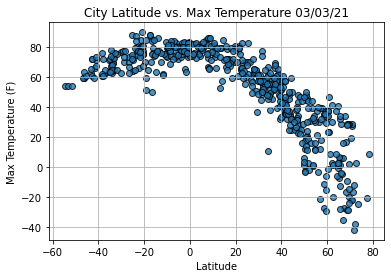

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

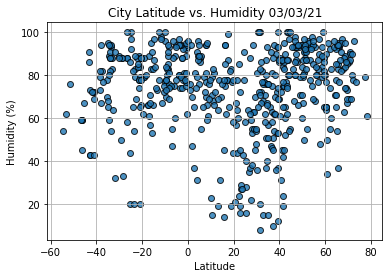

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

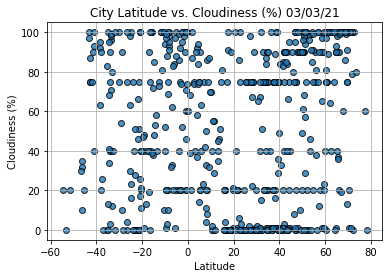

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

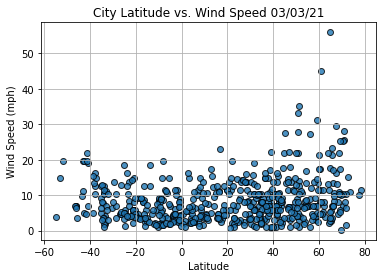

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2021-03-04 00:07:06,42.0970,-79.2353,35.01,95,90,7.16
1,Durant,US,2021-03-04 00:07:06,33.9940,-96.3708,66.20,37,1,6.91
2,Nikolskoye,RU,2021-03-04 00:07:07,59.7035,30.7861,33.01,80,40,13.42
6,Albany,US,2021-03-04 00:05:44,42.6001,-73.9662,37.99,60,90,8.05
9,Kodiak,US,2021-03-04 00:05:18,57.7900,-152.4072,39.20,48,20,13.80


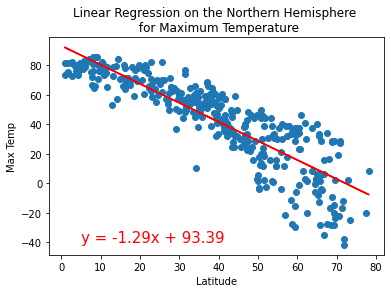

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(5,-40))
                       

In [23]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

-0.8677990643197185


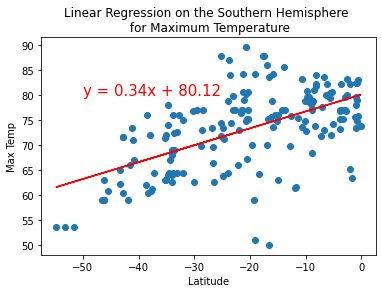

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,80))


In [25]:
 (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.5785353220449896


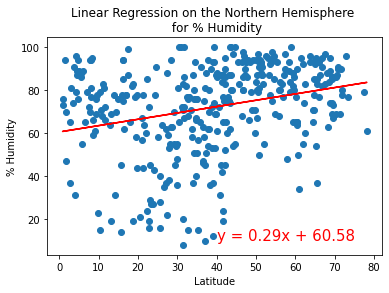

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

In [27]:
 (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.27396233052490404


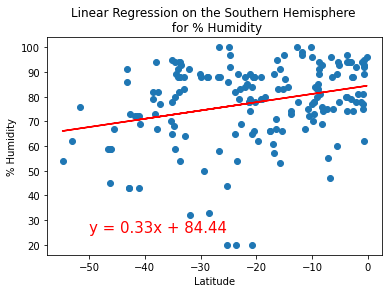

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,25))

In [29]:
 (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.28590056803426256


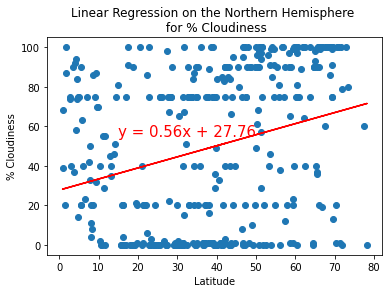

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(15,55))

In [31]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.27819118898097844


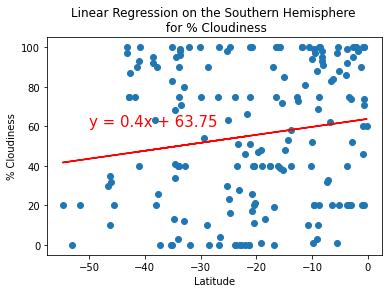

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

In [33]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.15627244787610237


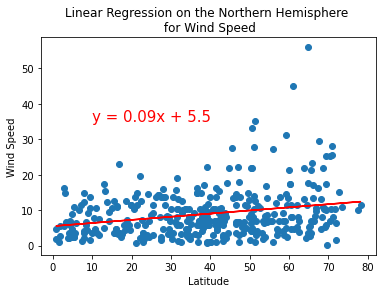

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(10,35))

In [46]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.2531336288916685


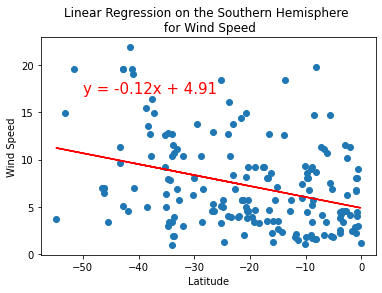

In [47]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,17))

In [48]:
(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

-0.33798627320263525
